In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
abund_df=pd.read_csv("test.abun.out",delimiter=" ")[["Particle","X(H2)"]]
particle_df=pd.read_csv("test.prop.out",delimiter=" ")[["Particle","n_H"]]
df=pd.read_csv("/home/jon/Documents/zupcx4/UCL_CHEMS/uclpdr/Input/cloud-square.dat",delimiter=",")
df=df[['Particle # ','      x (cm)      ']]
df=df.rename({'Particle # ':"Particle",'      x (cm)      ':'x'},axis=1)

In [99]:
particle_df=particle_df.merge(abund_df,on="Particle")

In [100]:
particle_df=particle_df.merge(df,on="Particle")

In [101]:
particle_df[particle_df.Particle==1000]

,Particle,n_H,X(H2),x
999,1000,100.0,0.361101,3.176658e+19


In [102]:
particle_df["delta_x"]=0.0
particle_df.loc[1:,"delta_x"]=particle_df.iloc[1:]["x"].values-particle_df.iloc[0:-1]["x"].values

In [103]:
particle_df["h_col"]=particle_df["delta_x"].values*particle_df["X(H2)"].values*particle_df["n_H"].values

In [104]:
particle_df["total_h_col"]=particle_df["h_col"].cumsum()

In [105]:
particle_df["size"]=particle_df.delta_x.cumsum()

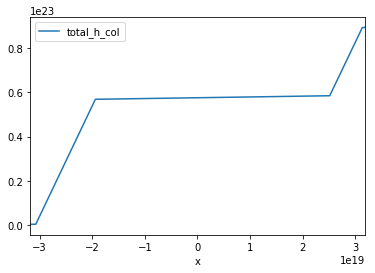

In [106]:
particle_df.plot(x="x",y="total_h_col")

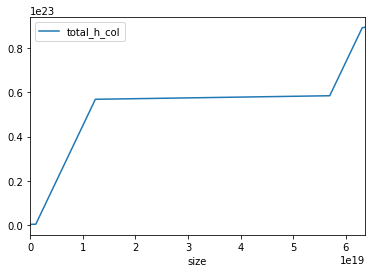

In [107]:
particle_df.plot(x="size",y="total_h_col")

In [108]:
particle_df=particle_df.iloc[::28]

In [109]:
particle_df.to_csv("model_tests.dat",index=False)